### Objective
    Find out the app category which are free for users and owner earn money by ads.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format='{:,.2f}'.format

In [2]:
data = pd.read_csv("googleplaystore.csv")
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### Checking data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
data.shape

(10841, 13)

In [5]:
data['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [6]:
data[data['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.00,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


#### in this app, category data is missing. so we will search it in google play store this app category and add in this row. 

In [7]:
clean_row = ['Life Made WI-Fi Touchscreen Photo Frame','LIFESTYLE' ,'1.9', 19.0, '3.0M',
        '1,000+', 'Free', '0', 'Everyone', 'Lifestyle', 'February 11, 2018',
        '1.0.19', '4.0 and up']
data[data["Category"]=="1.9"] = clean_row

In [8]:
data['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               383
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

#### Checking Apps

In [9]:
data["App"].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

#### Data showing duplication in Apps Column

In [10]:
data[data['App'] == 'Facebook']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.10,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.10,78128208,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device


In [11]:
data[data['App'] == 'Instagram']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.50,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.50,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.50,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.50,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


##### There is duplicate apps but with different reviews, so we will keep the app having max reviews

In [12]:
duplicate_apps = data[data.duplicated(subset = ['App'], keep = False)]
duplicate_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
36,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.70,8145,24M,"500,000+",Free,0,Everyone,Art & Design;Creativity,"August 2, 2018",1.0.9,4.4 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.40,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.60,2914724,Varies with device,"100,000,000+",Free,0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.00,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.40,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.50,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.50,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


In [13]:
duplicate_apps['App'].nunique()

798

In [14]:
duplicate_apps.shape

(1979, 13)

In [15]:
 1979-798
    

1181

In [16]:
data.shape

(10841, 13)

In [17]:
10841-1181

9660

#### Now we will filter max reviews apps

In [18]:
max_reviews = data.groupby("App")['Reviews'].max()
max_reviews

App
"i DT" Fútbol. Todos Somos Técnicos.                   27
+Download 4 Instagram Twitter                       40467
- Free Comics - Comic Apps                            115
.R                                                    259
/u/app                                                573
                                                    ...  
뽕티비 - 개인방송, 인터넷방송, BJ방송                               414
💎 I'm rich                                            718
💘 WhatsLov: Smileys of love, stickers and GIF       22098
📏 Smart Ruler ↔️ cm/inch measuring for homework!       19
🔥 Football Wallpapers 4K | Full HD Backgrounds 😍    11661
Name: Reviews, Length: 9660, dtype: object

##### Cleaning

In [19]:
clean = []

for index, row in data.iterrows():
    name = row['App'] 
    review = row['Reviews']
    
    if(max_reviews[name] == review):
        clean.append(row)

In [20]:
clean[:10]

[App               Photo Editor & Candy Camera & Grid & ScrapBook
 Category                                          ART_AND_DESIGN
 Rating                                                      4.10
 Reviews                                                      159
 Size                                                         19M
 Installs                                                 10,000+
 Type                                                        Free
 Price                                                          0
 Content Rating                                          Everyone
 Genres                                              Art & Design
 Last Updated                                     January 7, 2018
 Current Ver                                                1.0.0
 Android Ver                                         4.0.3 and up
 Name: 0, dtype: object,
 App               U Launcher Lite – FREE Live Cool Themes, Hide ...
 Category                                       

In [21]:
clean = []

already_add = []

for index, row in data.iterrows():
    name = row['App'] 
    review = row['Reviews']
    
    if(max_reviews[name] == review) and (name not in already_add):
        clean.append(row)
        already_add.append(name)

In [22]:
len(clean)

9660

In [23]:
# Converting list into data frame

clean_data = pd.DataFrame(clean)
clean_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.40,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


### Removing Non English Apps

In [24]:
def is_english(app):
    lst = []
    for i in app:
        if ord(i) > 127:
            lst.append(False)
        else:
            lst.append(True)
    check = set(lst)
    if False in check:
        return False
    else:
        return True

In [25]:
is_english('Facebook')

True

In [26]:
def is_english(app_name):
    lst = []
    for i in app_name:
        if ord(i) >127:
            lst.append(False)
        else:
            lst.append(True)
    
    non_ascii = 0
    
    for j in lst:
        if j == False:
            non_ascii += 1
            
#emoji is not more than 4            
    if non_ascii > 4:
        return False
    else:
        return True

In [27]:
clean_data['App'].apply(is_english)

0        True
2        True
3        True
4        True
5        True
         ... 
10836    True
10837    True
10838    True
10839    True
10840    True
Name: App, Length: 9660, dtype: bool

In [28]:
Eng_apps = clean_data[clean_data['App'].apply(is_english)]
Eng_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.40,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [29]:
Eng_apps.shape

(9620, 13)

## Analysis

#### As we have to work on free apps so we will check free apps

In [30]:
free_apps = Eng_apps[Eng_apps["Price"]=='0']
free_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.40,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.50,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.00,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.50,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [31]:
free_apps["Category"].value_counts()

FAMILY                 1680
GAME                    859
TOOLS                   749
BUSINESS                407
LIFESTYLE               348
PRODUCTIVITY            345
FINANCE                 328
MEDICAL                 312
SPORTS                  301
PERSONALIZATION         294
COMMUNICATION           287
HEALTH_AND_FITNESS      273
PHOTOGRAPHY             261
NEWS_AND_MAGAZINES      248
SOCIAL                  236
TRAVEL_AND_LOCAL        207
SHOPPING                199
BOOKS_AND_REFERENCE     191
DATING                  165
VIDEO_PLAYERS           159
MAPS_AND_NAVIGATION     125
FOOD_AND_DRINK          110
EDUCATION               104
ENTERTAINMENT            85
LIBRARIES_AND_DEMO       83
AUTO_AND_VEHICLES        82
HOUSE_AND_HOME           73
WEATHER                  71
EVENTS                   63
PARENTING                58
ART_AND_DESIGN           57
COMICS                   55
BEAUTY                   53
Name: Category, dtype: int64

In [32]:
round(free_apps['Category'].value_counts(normalize= True)*100,1)

FAMILY                18.90
GAME                   9.70
TOOLS                  8.40
BUSINESS               4.60
LIFESTYLE              3.90
PRODUCTIVITY           3.90
FINANCE                3.70
MEDICAL                3.50
SPORTS                 3.40
PERSONALIZATION        3.30
COMMUNICATION          3.20
HEALTH_AND_FITNESS     3.10
PHOTOGRAPHY            2.90
NEWS_AND_MAGAZINES     2.80
SOCIAL                 2.70
TRAVEL_AND_LOCAL       2.30
SHOPPING               2.20
BOOKS_AND_REFERENCE    2.20
DATING                 1.90
VIDEO_PLAYERS          1.80
MAPS_AND_NAVIGATION    1.40
FOOD_AND_DRINK         1.20
EDUCATION              1.20
ENTERTAINMENT          1.00
LIBRARIES_AND_DEMO     0.90
AUTO_AND_VEHICLES      0.90
HOUSE_AND_HOME         0.80
WEATHER                0.80
EVENTS                 0.70
PARENTING              0.70
ART_AND_DESIGN         0.60
COMICS                 0.60
BEAUTY                 0.60
Name: Category, dtype: float64

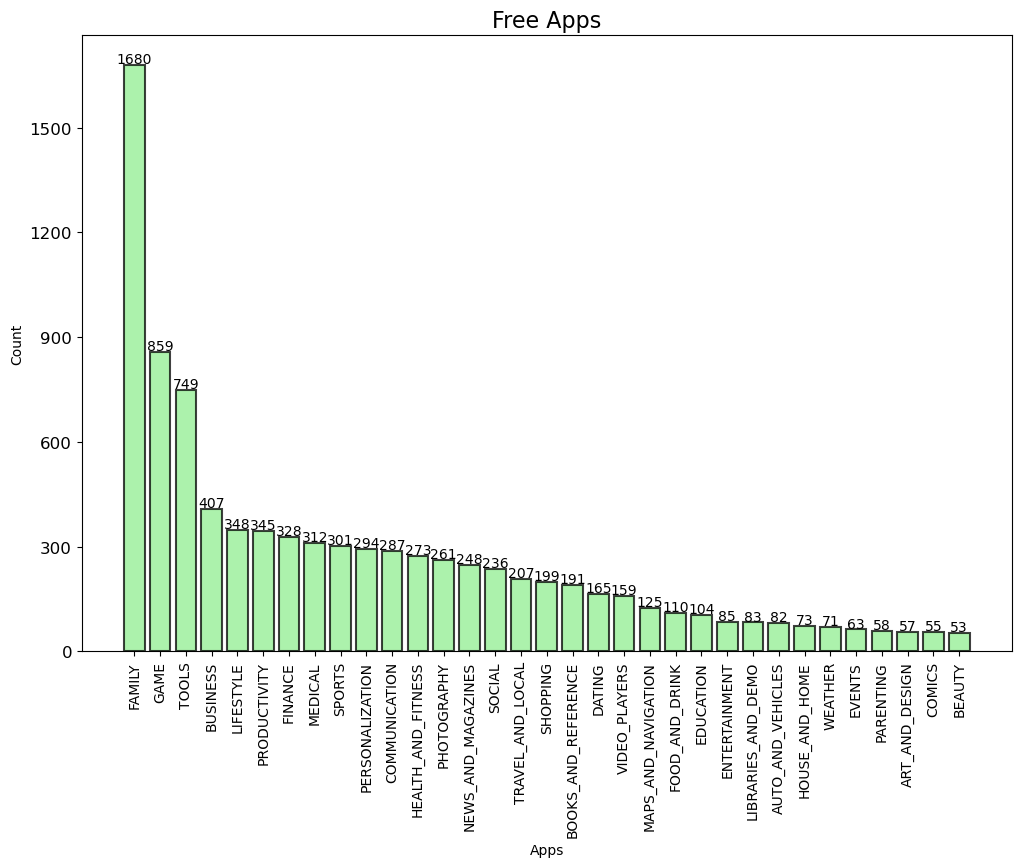

In [33]:
# Creating Bar chart
categories = free_apps['Category'].value_counts().index
count = free_apps['Category'].value_counts().values
round(free_apps['Category'].value_counts(normalize= True)*100,1)

plt.figure(figsize = (12,8))
plt.bar(categories, count,color= 'lightgreen' ,alpha = 0.75 , edgecolor = 'black' , linewidth = 1.5)
plt.title("Free Apps", fontsize = 16)
plt.xlabel("Apps")
plt.ylabel("Count")
plt.xticks(rotation = 90 , fontsize =10) 
plt.yticks(fontsize=12)
plt.yticks(range(0,1800,300))

for categories,count in zip(categories,count):
    plt.text(categories,count+5,str(count),ha='center',fontsize=10)
plt.show()    

#### We will choose top 10 

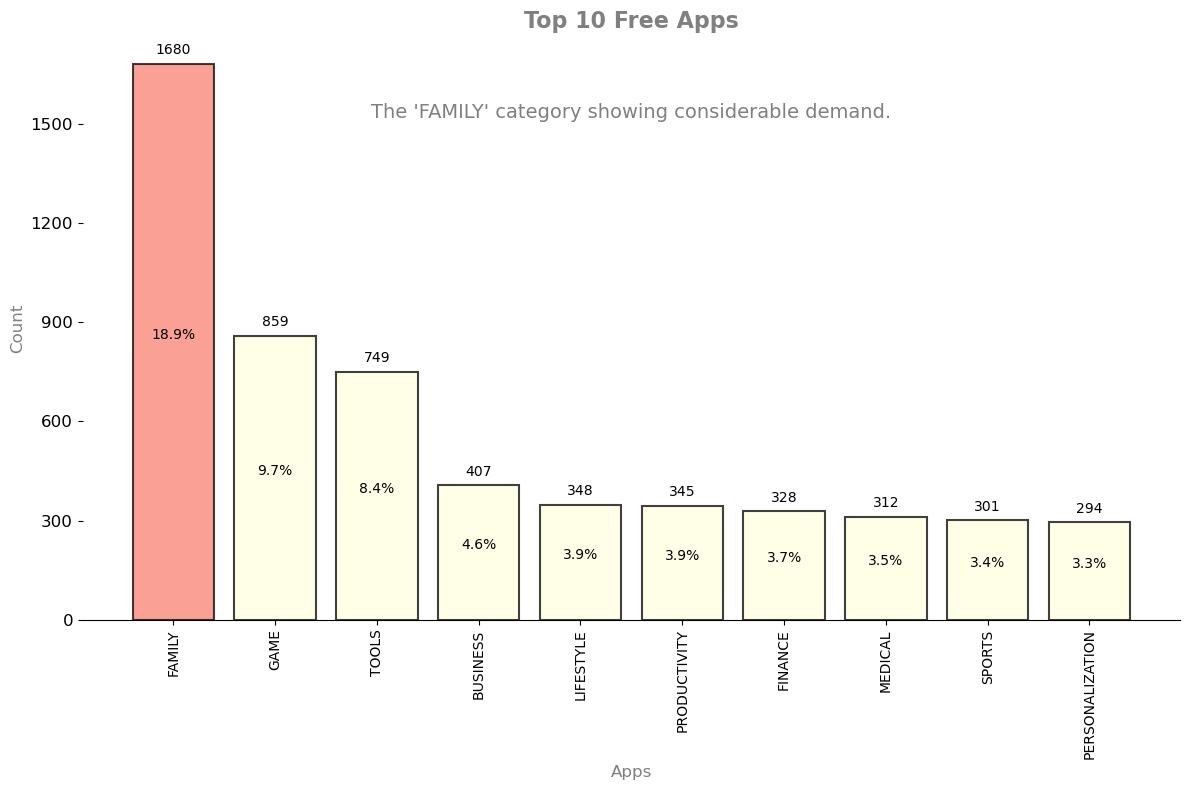

In [34]:
categories = free_apps['Category'].value_counts().index[:10]
count = free_apps['Category'].value_counts().values[:10]
percentage = round(free_apps['Category'].value_counts(normalize= True)*100,1)

plt.figure(figsize = (12,8))
bars = plt.bar(categories, count,color= 'lightyellow' ,alpha = 0.75 , edgecolor = 'black' , linewidth = 1.5)
plt.title("Top 10 Free Apps", fontsize = 16, color = 'grey',weight = 'bold')
plt.xlabel("Apps", fontsize = 12, color = 'grey')
plt.ylabel("Count", fontsize = 12, color = 'grey')
plt.xticks(rotation = 90 , fontsize =10) 
plt.yticks(fontsize=12)
plt.yticks(range(0,1800,300))

plt.text(0.5 , 0.86 , "The 'FAMILY' category showing considerable demand." ,
         horizontalalignment = 'center' , transform = plt.gca().transAxes , 
         color = 'grey' , fontsize = 14)
    
#highest category
max_count_category = categories[count.argmax()]

#Highlight the Bar and make color
max_count_index = list(categories).index(max_count_category)
bars[max_count_index].set_color('salmon')
bars[max_count_index].set_edgecolor('black')
    
    
for bar, perc in zip(bars , percentage):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 ,height + 20, '%d'% int(height) , ha = 'center' ,\
             va = 'bottom' , fontsize = 10) # counts_no. writtten on above bar
    plt.text(bar.get_x() + bar.get_width()/2 ,height / 2 , f'{perc}%', ha = 'center' ,\
             va = 'bottom' , fontsize = 10) #percentage written in bar
    
for i in ['top' , 'left' , 'right']:
    plt.gca().spines[i].set_visible(False)
    
#adjust layout to clipping
plt.tight_layout()    
plt.show()    

### Now we will pick "Family" category for further working

In [35]:
free_apps[free_apps['Category']=='FAMILY']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2017,Jewels Crush- Match 3 Puzzle,FAMILY,4.40,14774,19M,"1,000,000+",Free,0,Everyone,Casual;Brain Games,"July 23, 2018",1.9.3901,4.0.3 and up
2018,Coloring & Learn,FAMILY,4.40,12753,51M,"5,000,000+",Free,0,Everyone,Educational;Creativity,"July 17, 2018",1.49,4.0.3 and up
2019,Mahjong,FAMILY,4.50,33983,22M,"5,000,000+",Free,0,Everyone,Puzzle;Brain Games,"August 2, 2018",1.24.3181,4.0.3 and up
2020,Super ABC! Learning games for kids! Preschool ...,FAMILY,4.60,20267,46M,"1,000,000+",Free,0,Everyone,Educational;Education,"July 16, 2018",1.1.6.7,4.1 and up
2021,Toy Pop Cubes,FAMILY,4.50,5761,21M,"1,000,000+",Free,0,Everyone,Casual;Brain Games,"July 4, 2018",1.8.3181,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10821,Poop FR,FAMILY,NaN,6,2.5M,50+,Free,0,Everyone,Entertainment,"May 29, 2018",1.0,4.0.3 and up
10827,Fr Agnel Ambarnath,FAMILY,4.20,117,13M,"5,000+",Free,0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
10834,FR Calculator,FAMILY,4.00,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.50,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up


#### we will see most installing apps

In [36]:
free_apps['Installs'].value_counts()

1,000,000+        1396
100,000+          1025
10,000,000+        932
10,000+            906
1,000+             746
100+               613
5,000,000+         606
500,000+           494
50,000+            423
5,000+             400
10+                314
500+               288
50,000,000+        203
100,000,000+       188
50+                170
5+                  70
1+                  45
500,000,000+        24
1,000,000,000+      20
0+                   4
0                    1
Name: Installs, dtype: int64

In [37]:
#Removing + and , sign
free_apps['Installs'] = free_apps['Installs'].str.replace('+' ,'').str.replace(',' ,'').astype(int)
free_apps['Installs'].value_counts().sort_index()

0                5
1               45
5               70
10             314
50             170
100            613
500            288
1000           746
5000           400
10000          906
50000          423
100000        1025
500000         494
1000000       1396
5000000        606
10000000       932
50000000       203
100000000      188
500000000       24
1000000000      20
Name: Installs, dtype: int64

In [38]:
install = free_apps['Installs'].value_counts().sort_index()
install

0                5
1               45
5               70
10             314
50             170
100            613
500            288
1000           746
5000           400
10000          906
50000          423
100000        1025
500000         494
1000000       1396
5000000        606
10000000       932
50000000       203
100000000      188
500000000       24
1000000000      20
Name: Installs, dtype: int64

#### taking more than 1000 intallations apps

In [39]:
max_installs =  install[install.index >= 1000]
max_installs

1000           746
5000           400
10000          906
50000          423
100000        1025
500000         494
1000000       1396
5000000        606
10000000       932
50000000       203
100000000      188
500000000       24
1000000000      20
Name: Installs, dtype: int64

#### changing into alphanumeric

In [40]:
def alphanumeric_units(value):
    if value >= 1e9:
        return f'{value / 1e9:.0f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.0f}K'
    else:
        return f'{value:.0f}'

In [41]:
index_install = max_installs.index.map(alphanumeric_units)
index_install

Index(['1K', '5K', '10K', '50K', '100K', '500K', '1M', '5M', '10M', '50M',
       '100M', '500M', '1B'],
      dtype='object')

In [42]:
index_values = max_installs.values
index_values

array([ 746,  400,  906,  423, 1025,  494, 1396,  606,  932,  203,  188,
         24,   20], dtype=int64)

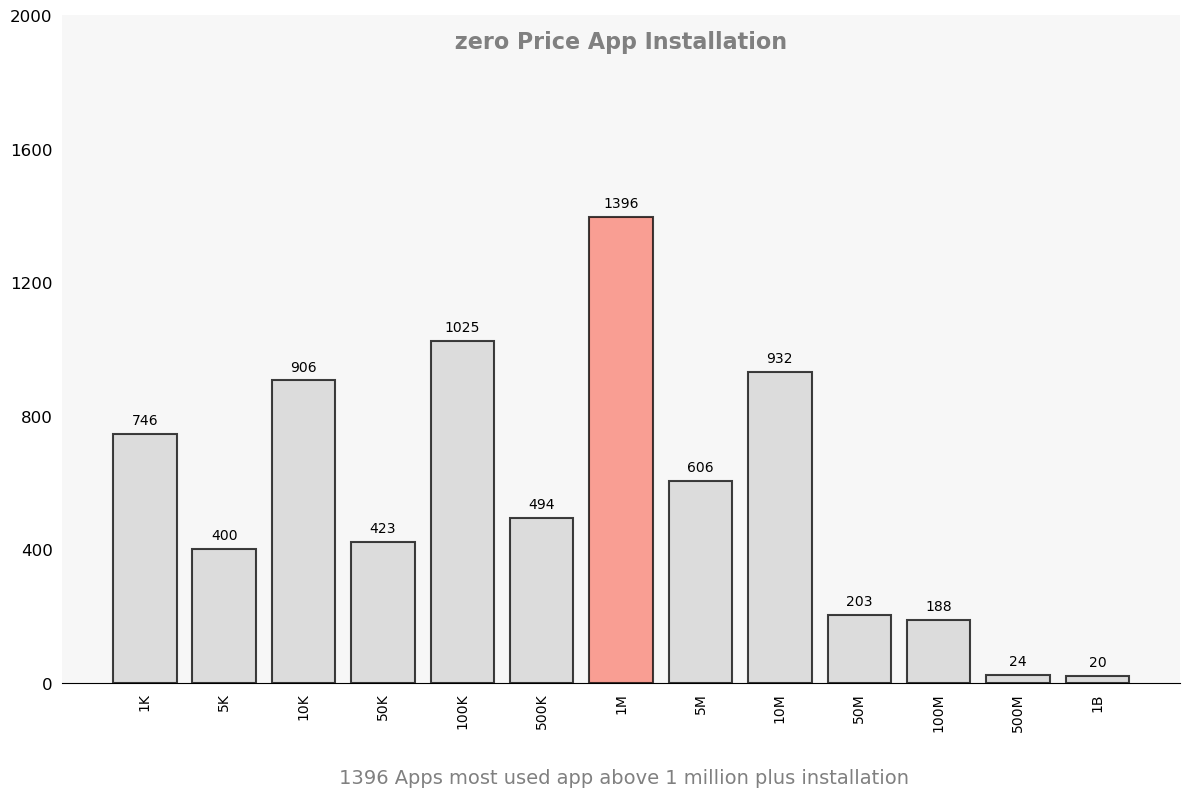

In [43]:
categories = index_install
count = index_values


#Create Bar
plt.figure(figsize =(12,8))
bars = plt.bar(categories , count , color= 'lightgrey' ,alpha = 0.75 , edgecolor = 'black' , linewidth = 1.5) 
plt.xticks(rotation = 90 , fontsize =10) 
plt.yticks(fontsize=12)

plt.yticks(range(0,2400,400))
plt.tick_params(bottom = 0, left = 0)

#highest category
max_count_category = categories[count.argmax()]

#Highlight the Bar and make color
max_count_index = list(categories).index(max_count_category)
bars[max_count_index].set_color('salmon')
bars[max_count_index].set_edgecolor('black')

#adding label & percentage inside each bar
for bar, perc in zip(bars , percentage):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 ,height + 20, '%d'% int(height) , ha = 'center' ,\
             va = 'bottom' , fontsize = 10) # counts_no. writtten on above bar
    
    
#Add Background Color
ax = plt.gca()
ax.set_facecolor("#f7f7f7")

#Add chart Title inside chart(Heading Line)
plt.text(0.5 , 0.95 , ' zero Price App Installation ' , horizontalalignment = 'center' , transform = plt.gca().transAxes , 
         color = 'grey' , fontweight = 'bold' ,fontsize =16)
         
#Add chart Title inside chart(Bottom Line)
plt.text(0.5 , -0.15 , " 1396 Apps most used app above 1 million plus installation" \
         , transform = plt.gca().transAxes , color = 'grey' , fontsize = 14, horizontalalignment = 'center')
    
#Remove Spines(Boundries lines remove)
for i in ['top' , 'left' , 'right']:
    plt.gca().spines[i].set_visible(False)
    
#adjust layout to clipping
plt.tight_layout()

plt.show()


In [44]:
pd.options.display.float_format = '{:.0f}'.format
# Create the pivot table
cate_install = pd.pivot_table(free_apps, values='Installs', index='Category', aggfunc='mean')

# Sort the pivot table by the 'Installs' column in descending order
cate_install = cate_install.sort_values(by='Installs', ascending=False)

# To make SERIES , if we don't write this code below it will come in DF
cate_install = cate_install['Installs']
pd.options.display.float_format

cate_install

Category
COMMUNICATION         38456119
VIDEO_PLAYERS         24727872
SOCIAL                23253652
PHOTOGRAPHY           17805628
PRODUCTIVITY          16787331
GAME                  15560966
TRAVEL_AND_LOCAL      13984078
ENTERTAINMENT         11640706
TOOLS                 10682301
NEWS_AND_MAGAZINES     9549178
BOOKS_AND_REFERENCE    8721959
SHOPPING               7036877
PERSONALIZATION        5201483
WEATHER                5074486
HEALTH_AND_FITNESS     4188822
MAPS_AND_NAVIGATION    4025286
FAMILY                 3690474
SPORTS                 3638640
ART_AND_DESIGN         1986335
FOOD_AND_DRINK         1924898
EDUCATION              1820673
BUSINESS               1712290
LIFESTYLE              1429585
FINANCE                1387692
HOUSE_AND_HOME         1331541
DATING                  854029
COMICS                  817657
AUTO_AND_VEHICLES       647318
LIBRARIES_AND_DEMO      638504
PARENTING               542604
BEAUTY                  513152
EVENTS                  253542

In [45]:
def alphanumeric_units(value):
    if value >= 1e9:
        return f'{value / 1e9:.1f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.1f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.1f}K'
    else:
        return f'{value:.1f}'


In [46]:
cate_units = cate_install.map(alphanumeric_units)
cate_units

Category
COMMUNICATION           38.5M
VIDEO_PLAYERS           24.7M
SOCIAL                  23.3M
PHOTOGRAPHY             17.8M
PRODUCTIVITY            16.8M
GAME                    15.6M
TRAVEL_AND_LOCAL        14.0M
ENTERTAINMENT           11.6M
TOOLS                   10.7M
NEWS_AND_MAGAZINES       9.5M
BOOKS_AND_REFERENCE      8.7M
SHOPPING                 7.0M
PERSONALIZATION          5.2M
WEATHER                  5.1M
HEALTH_AND_FITNESS       4.2M
MAPS_AND_NAVIGATION      4.0M
FAMILY                   3.7M
SPORTS                   3.6M
ART_AND_DESIGN           2.0M
FOOD_AND_DRINK           1.9M
EDUCATION                1.8M
BUSINESS                 1.7M
LIFESTYLE                1.4M
FINANCE                  1.4M
HOUSE_AND_HOME           1.3M
DATING                 854.0K
COMICS                 817.7K
AUTO_AND_VEHICLES      647.3K
LIBRARIES_AND_DEMO     638.5K
PARENTING              542.6K
BEAUTY                 513.2K
EVENTS                 253.5K
MEDICAL                120.6K
N

In [47]:
cate_percentage = cate_units.value_counts(normalize = True)*100
cate_percentage

1.4M     6
38.5M    3
24.7M    3
253.5K   3
513.2K   3
542.6K   3
638.5K   3
647.3K   3
817.7K   3
854.0K   3
1.3M     3
1.7M     3
1.8M     3
1.9M     3
2.0M     3
3.6M     3
3.7M     3
4.0M     3
4.2M     3
5.1M     3
5.2M     3
7.0M     3
8.7M     3
9.5M     3
10.7M    3
11.6M    3
14.0M    3
15.6M    3
16.8M    3
17.8M    3
23.3M    3
120.6K   3
Name: Installs, dtype: float64

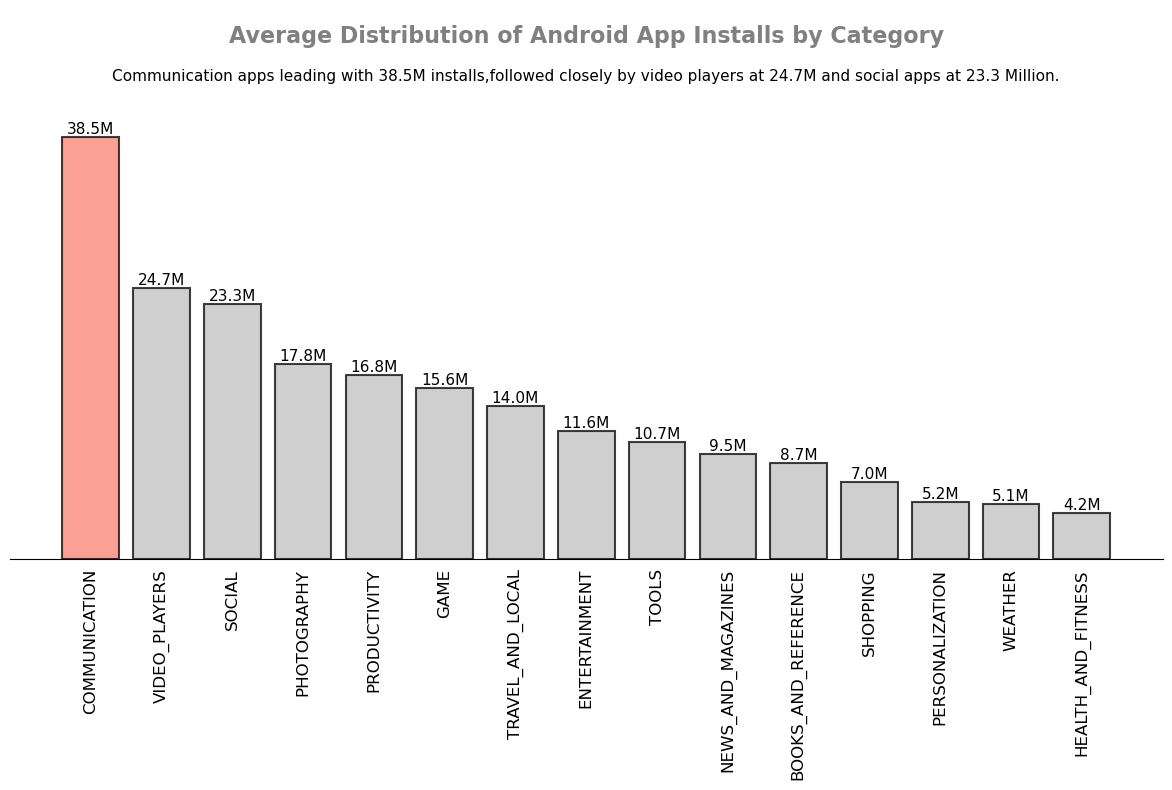

In [48]:
# Data
categories = cate_install.index[:15]
counts = cate_install.values[:15]

# Create a Stylish bar chart
plt.figure(figsize = (12,8))
bars = plt.bar(categories, counts, color = 'silver', alpha = 0.75, edgecolor = 'black', linewidth = 1.5)
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)

plt.xticks(fontsize = 12) 
plt.yticks(range(0, 60000000, 10000000), [], fontsize = 12)
plt.tick_params(bottom = 0, left = 0)

# Find the category with highest count
max_category = categories[counts.argmax()]

# Highlight the bar for the category with highest count
max_count_index = list(categories).index(max_category)
bars[max_count_index].set_color('salmon')
bars[max_count_index].set_edgecolor('black')

# Adding data labels and percentages inside each bar
for bar, units in zip(bars, cate_units.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 25, units, ha = 'center', va = 'bottom', fontsize = 11)
    

# Adding chart title inside the chart
plt.text(0.5, 0.94, 'Average Distribution of Android App Installs by Category', horizontalalignment = 'center', fontsize = 16,
         transform = plt.gca().transAxes, color = 'gray', fontweight = 'bold')

# Adding Conclusion inside the chart
plt.text(0.5, 0.87, '''Communication apps leading with 38.5M installs,followed closely by \
video players at 24.7M and social apps at 23.3 Million.''', 
        horizontalalignment = 'center', fontsize = 11, transform = plt.gca().transAxes)

# Removing Spines
bord = ['left', 'right', 'top']

for i in bord:
    plt.gca().spines[i].set_visible(False)
    
# Adjust layout to prevent clipping
plt.tight_layout()

plt.show()

In [49]:
categories = Eng_apps.groupby("Category")
communication = categories.get_group("COMMUNICATION")
communication[["App","Installs"]].head().reset_index()

,index,App,Installs
0,336,WhatsApp Messenger,"1,000,000,000+"
1,337,Messenger for SMS,"10,000,000+"
2,343,My Tele2,"5,000,000+"
3,346,imo beta free calls and text,"100,000,000+"
4,348,Contacts,"50,000,000+"


In [50]:
categories = Eng_apps.groupby("Category")
communication = categories.get_group("VIDEO_PLAYERS")
communication[["App","Installs"]].head().reset_index()

,index,App,Installs
0,3665,YouTube,"1,000,000,000+"
1,3666,All Video Downloader 2018,"1,000,000+"
2,3667,Video Downloader,"10,000,000+"
3,3668,HD Video Player,"1,000,000+"
4,3669,Iqiyi (for tablet),"1,000,000+"


In [51]:
categories = Eng_apps.groupby("Category")
communication = categories.get_group("SOCIAL")
communication[["App","Installs"]].head().reset_index()

,index,App,Installs
0,2544,Facebook,"1,000,000,000+"
1,2546,Facebook Lite,"500,000,000+"
2,2548,Tumblr,"100,000,000+"
3,2551,Social network all in one 2018,"100,000+"
4,2552,Pinterest,"100,000,000+"


In [52]:
categories = Eng_apps.groupby("Category")
communication = categories.get_group("PHOTOGRAPHY")
communication[["App","Installs"]].head().reset_index()

,index,App,Installs
0,2801,TouchNote: Cards & Gifts,"1,000,000+"
1,2803,FreePrints – Free Photos Delivered,"1,000,000+"
2,2804,Groovebook Photo Books & Gifts,"500,000+"
3,2805,"Moony Lab - Print Photos, Books & Magnets ™","50,000+"
4,2806,"LALALAB prints your photos, photobooks and mag...","1,000,000+"


## Findings
    we can see there are giants platforms like WhatsApp, YouTube, Facebook in starting categories which is very difficult to compete them.So we can work in Photography to get our goal.